# Porto Seguro Safe Driver Prediction - Data Processing and EDA

This notebook provides a starting point for processing and analyzing the Porto Seguro Safe Driver Prediction dataset.

## Sections:
1. **Setup and Data Extraction** - Import libraries and extract the dataset from the zip file
2. **Data Loading** - Read the extracted CSV files and display their structure
3. **Exploratory Data Analysis** - Perform basic EDA including summary statistics and visualizations
4. **Initial Insights** - Document key findings from the exploration

## 1. Setup and Data Extraction

First, we'll import the necessary libraries and extract the dataset from the zip file.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Structure

Now we'll load the extracted data files and examine their structure.

In [43]:
train_df= pd.read_csv('data/porto-seguro-safe-driver-prediction/train.csv')
print(f"Training data loaded successfully!")
print(f"Shape: {train_df.shape}")
print(f"Rows: {train_df.shape[0]:,}, Columns: {train_df.shape[1]}")

Training data loaded successfully!
Shape: (595212, 59)
Rows: 595,212, Columns: 59


In [44]:
# Display the first few rows
print("First 5 rows of the training dataset:\n")
train_df.head()

First 5 rows of the training dataset:



,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [45]:
#display only columns with suffix _cat
train_df[train_df.columns[train_df.columns.str.endswith('_cat')]]


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1,0,0,10,1,-1,0,1,1,1,1,0,1,31
595208,1,0,0,9,1,-1,0,-1,15,0,0,2,1,63
595209,1,0,0,7,1,-1,0,-1,1,1,1,2,1,31
595210,2,1,0,11,1,-1,0,-1,11,1,1,2,1,101


First step in this is to get our data better organized. Lets start by dropping all the columns with calc_ and convert all -1 to NaN

In [46]:
#drop all columns with calc_
train_df = train_df.drop(columns=[col for col in train_df.columns if 'calc_' in col])
#convert all -1 to NaN
train_df = train_df.replace(-1, np.nan)
#display the first 5 rows
train_df.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000


Alright, looking at this we now have 39 columns
Let's take a look at which columns have NaN where

In [47]:
#display columns with NaN
train_df.isnull().sum()



id                    0
target                0
ps_ind_01             0
ps_ind_02_cat       216
ps_ind_03             0
ps_ind_04_cat        83
ps_ind_05_cat      5809
ps_ind_06_bin         0
ps_ind_07_bin         0
ps_ind_08_bin         0
ps_ind_09_bin         0
ps_ind_10_bin         0
ps_ind_11_bin         0
ps_ind_12_bin         0
ps_ind_13_bin         0
ps_ind_14             0
ps_ind_15             0
ps_ind_16_bin         0
ps_ind_17_bin         0
ps_ind_18_bin         0
ps_reg_01             0
ps_reg_02             0
ps_reg_03        107772
ps_car_01_cat       107
ps_car_02_cat         5
ps_car_03_cat    411231
ps_car_04_cat         0
ps_car_05_cat    266551
ps_car_06_cat         0
ps_car_07_cat     11489
ps_car_08_cat         0
ps_car_09_cat       569
ps_car_10_cat         0
ps_car_11_cat         0
ps_car_11             5
ps_car_12             1
ps_car_13             0
ps_car_14         42620
ps_car_15             0
dtype: int64

In [48]:
#drop columns with more than 10% NaN
train_df = train_df.dropna(axis=1, thresh=len(train_df) * 0.9)
#display the first 5 rows
train_df.head()




,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000


In [49]:
#show target unique values
train_df['target'].unique()




array([0, 1])

In [50]:
# Handle missing values BEFORE one-hot encoding
print(f"Missing values before imputation: {train_df.isnull().sum().sum()}\n")
print("Missing values by column:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

# Import imputer
from sklearn.impute import SimpleImputer

# Separate target from features for imputation
target = train_df['target']
features = train_df.drop('target', axis=1)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(
    imputer.fit_transform(features), 
    columns=features.columns,
    index=features.index
)

# Recombine with target
train_df = pd.concat([target, features_imputed], axis=1)

print(f"\nMissing values after imputation: {train_df.isnull().sum().sum()}")
train_df.info()


Missing values before imputation: 60904

Missing values by column:
ps_ind_02_cat      216
ps_ind_04_cat       83
ps_ind_05_cat     5809
ps_car_01_cat      107
ps_car_02_cat        5
ps_car_07_cat    11489
ps_car_09_cat      569
ps_car_11            5
ps_car_12            1
ps_car_14        42620
dtype: int64

Missing values after imputation: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 36 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   target         595212 non-null  int64  
 1   id             595212 non-null  float64
 2   ps_ind_01      595212 non-null  float64
 3   ps_ind_02_cat  595212 non-null  float64
 4   ps_ind_03      595212 non-null  float64
 5   ps_ind_04_cat  595212 non-null  float64
 6   ps_ind_05_cat  595212 non-null  float64
 7   ps_ind_06_bin  595212 non-null  float64
 8   ps_ind_07_bin  595212 non-null  float64
 9   ps_ind_08_bin  595212 non-null  float64
 10

In [51]:
#show target distribution
train_df['target'].value_counts()






target
0    573518
1     21694
Name: count, dtype: int64

In [52]:
#display columns with NaN
train_df.isnull().sum()




target           0
id               0
ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_10_bin    0
ps_ind_11_bin    0
ps_ind_12_bin    0
ps_ind_13_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_04_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_10_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

Note: you may need to restart the kernel to use updated packages.


<Axes: >

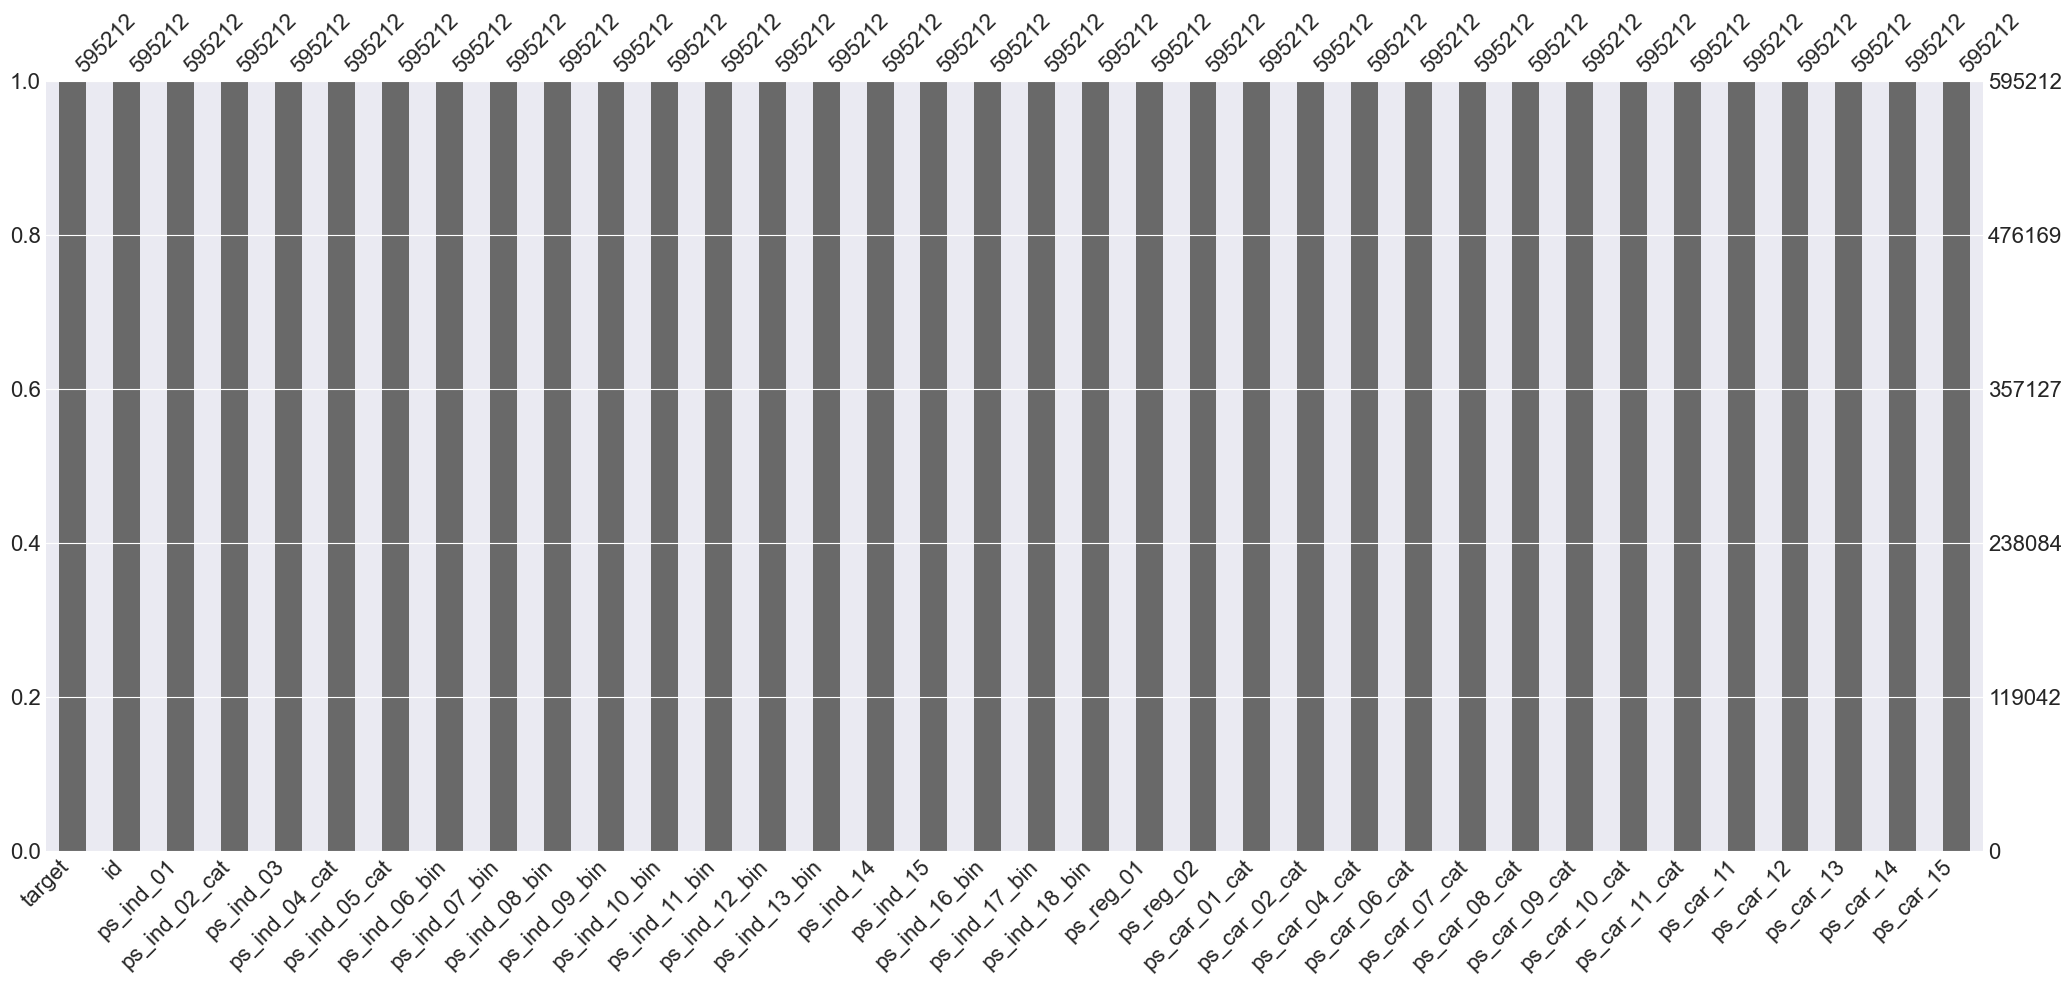

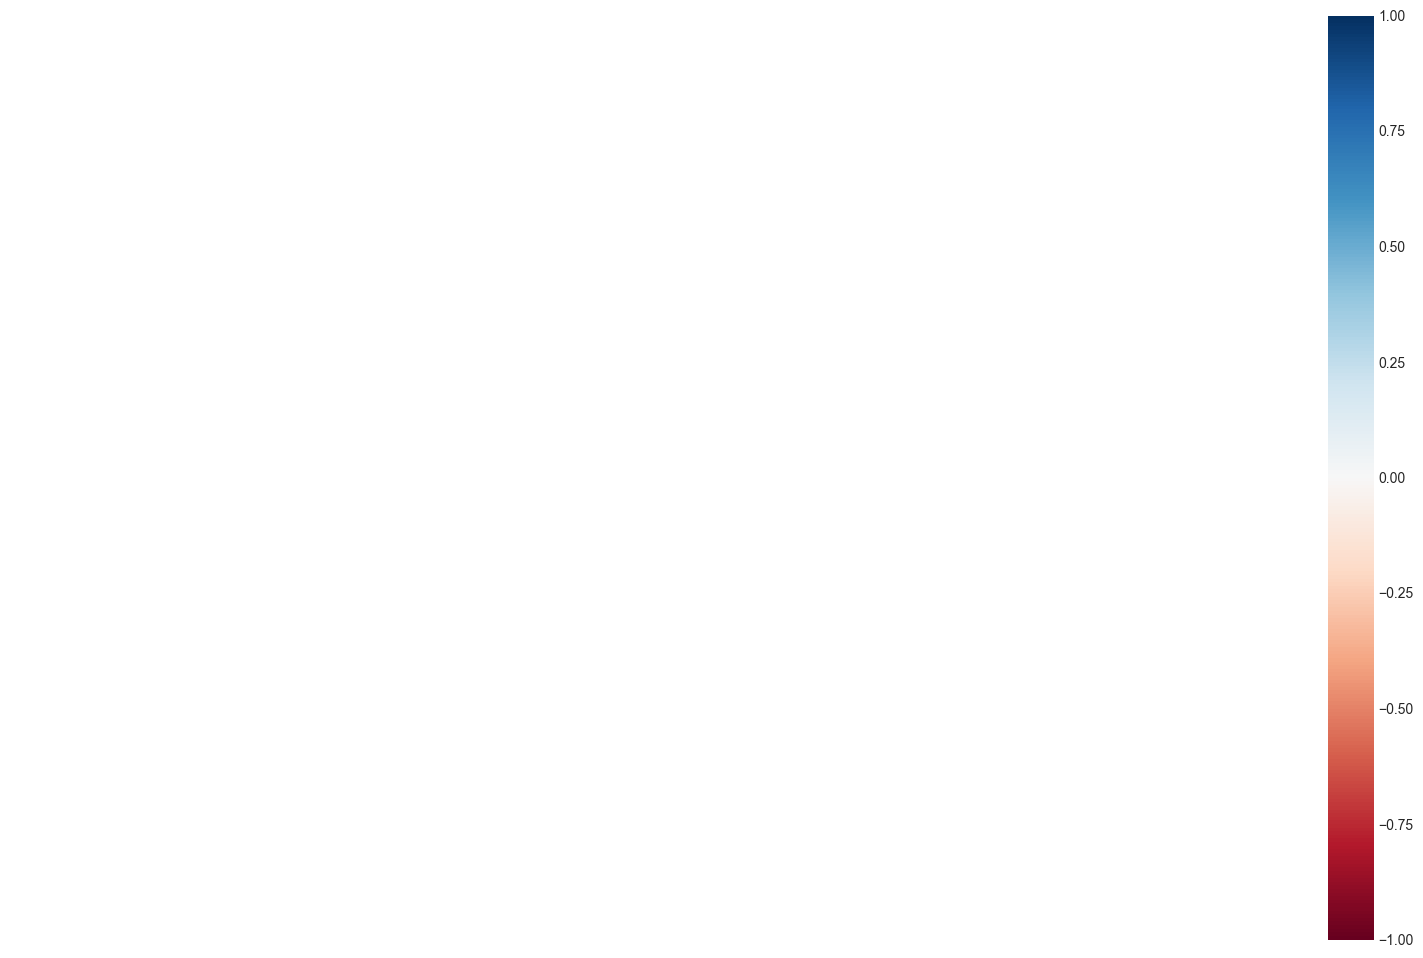

In [53]:
#install missingno if not already installed
%pip install missingno

#use missingno to visualize the missing values
import missingno as msno
msno.bar(train_df)

#display the missing values as a heatmap
msno.heatmap(train_df)


In [54]:
# Display column information
print("Dataset Information:\n")
train_df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 36 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   target         595212 non-null  int64  
 1   id             595212 non-null  float64
 2   ps_ind_01      595212 non-null  float64
 3   ps_ind_02_cat  595212 non-null  float64
 4   ps_ind_03      595212 non-null  float64
 5   ps_ind_04_cat  595212 non-null  float64
 6   ps_ind_05_cat  595212 non-null  float64
 7   ps_ind_06_bin  595212 non-null  float64
 8   ps_ind_07_bin  595212 non-null  float64
 9   ps_ind_08_bin  595212 non-null  float64
 10  ps_ind_09_bin  595212 non-null  float64
 11  ps_ind_10_bin  595212 non-null  float64
 12  ps_ind_11_bin  595212 non-null  float64
 13  ps_ind_12_bin  595212 non-null  float64
 14  ps_ind_13_bin  595212 non-null  float64
 15  ps_ind_14      595212 non-null  float64
 16  ps_ind_15      595212 non-null  float64
 17  ps_ind_

Now we want to cut down stuff even further by dropping id, ps_car_03_cat, ps_car_05_cat


In [55]:
#drop id column
train_df = train_df.drop(columns=['id'])
train_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   target         595212 non-null  int64  
 1   ps_ind_01      595212 non-null  float64
 2   ps_ind_02_cat  595212 non-null  float64
 3   ps_ind_03      595212 non-null  float64
 4   ps_ind_04_cat  595212 non-null  float64
 5   ps_ind_05_cat  595212 non-null  float64
 6   ps_ind_06_bin  595212 non-null  float64
 7   ps_ind_07_bin  595212 non-null  float64
 8   ps_ind_08_bin  595212 non-null  float64
 9   ps_ind_09_bin  595212 non-null  float64
 10  ps_ind_10_bin  595212 non-null  float64
 11  ps_ind_11_bin  595212 non-null  float64
 12  ps_ind_12_bin  595212 non-null  float64
 13  ps_ind_13_bin  595212 non-null  float64
 14  ps_ind_14      595212 non-null  float64
 15  ps_ind_15      595212 non-null  float64
 16  ps_ind_16_bin  595212 non-null  float64
 17  ps_ind_17_bin  595212 non-nul

In [56]:
#use one hot encoding for all categorical variables
train_df = pd.get_dummies(train_df)
train_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   target         595212 non-null  int64  
 1   ps_ind_01      595212 non-null  float64
 2   ps_ind_02_cat  595212 non-null  float64
 3   ps_ind_03      595212 non-null  float64
 4   ps_ind_04_cat  595212 non-null  float64
 5   ps_ind_05_cat  595212 non-null  float64
 6   ps_ind_06_bin  595212 non-null  float64
 7   ps_ind_07_bin  595212 non-null  float64
 8   ps_ind_08_bin  595212 non-null  float64
 9   ps_ind_09_bin  595212 non-null  float64
 10  ps_ind_10_bin  595212 non-null  float64
 11  ps_ind_11_bin  595212 non-null  float64
 12  ps_ind_12_bin  595212 non-null  float64
 13  ps_ind_13_bin  595212 non-null  float64
 14  ps_ind_14      595212 non-null  float64
 15  ps_ind_15      595212 non-null  float64
 16  ps_ind_16_bin  595212 non-null  float64
 17  ps_ind_17_bin  595212 non-nul

In [57]:
# Display column names and their data types
print("Column Names and Data Types:\n")
column_info = pd.DataFrame({
    'Column': train_df.columns,
    'Data Type': train_df.dtypes.values,
    'Non-Null Count': train_df.count().values,
    'Null Count': train_df.isnull().sum().values
})
column_info

Column Names and Data Types:



,Column,Data Type,Non-Null Count,Null Count
0,target,int64,595212,0
1,ps_ind_01,float64,595212,0
2,ps_ind_02_cat,float64,595212,0
3,ps_ind_03,float64,595212,0
4,ps_ind_04_cat,float64,595212,0
5,ps_ind_05_cat,float64,595212,0
6,ps_ind_06_bin,float64,595212,0
7,ps_ind_07_bin,float64,595212,0
8,ps_ind_08_bin,float64,595212,0
9,ps_ind_09_bin,float64,595212,0


In [58]:
# Save cleaned training data as CSV
train_df.to_csv('data/train_cleaned.csv', index=False)
print(f"Cleaned data saved to 'data/train_cleaned.csv'")
print(f"Shape: {train_df.shape}")
print(f"File includes: {train_df.shape[0]:,} rows and {train_df.shape[1]} columns")


Cleaned data saved to 'data/train_cleaned.csv'
Shape: (595212, 35)
File includes: 595,212 rows and 35 columns


In [ ]:
# Save cleaned training data
train_df.to_pickle('data/train_cleaned.pkl')

## 3. Exploratory Data Analysis (EDA)

Let's perform comprehensive exploratory data analysis to understand the dataset better.

### 3.1 Summary Statistics

In [36]:
# Generate summary statistics for all numerical columns
print("Summary Statistics:\n")
train_df.describe()

Summary Statistics:



,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000,595207.000000,595211.000000,595212.000000,552592.000000,595212.000000
mean,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,0.185304,...,0.947621,0.832080,1.331118,0.992136,62.215674,2.346100,0.379947,0.813265,0.374691,3.065899
std,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,0.388544,...,0.222791,0.373796,0.976559,0.091619,33.012455,0.832495,0.058300,0.224588,0.045610,0.731366
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.250619,0.109545,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.350428,2.828427
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.373497,3.316625
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,93.000000,3.000000,0.400000,0.906190,0.398121,3.605551
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,2.000000,104.000000,3.000000,1.264911,3.720626,0.636396,3.741657


In [37]:
# Check the target variable distribution
print("Target Variable Distribution:\n")
print(train_df['target'].value_counts())
print(f"\nTarget Distribution (%):\n{train_df['target'].value_counts(normalize=True) * 100}")

Target Variable Distribution:

target
0    573518
1     21694
Name: count, dtype: int64

Target Distribution (%):
target
0    96.355248
1     3.644752
Name: proportion, dtype: float64


### 3.2 Missing Values Analysis

In [38]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Column': train_df.columns,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df_filtered) > 0:
    print("Columns with Missing Values:\n")
    print(missing_df_filtered)
else:
    print("No missing values found in the dataset!")

Columns with Missing Values:

           Column  Missing Count  Missing Percentage
33      ps_car_14          42620            7.160474
25  ps_car_07_cat          11489            1.930237
5   ps_ind_05_cat           5809            0.975955
27  ps_car_09_cat            569            0.095596
2   ps_ind_02_cat            216            0.036290
21  ps_car_01_cat            107            0.017977
4   ps_ind_04_cat             83            0.013945
22  ps_car_02_cat              5            0.000840
30      ps_car_11              5            0.000840
31      ps_car_12              1            0.000168


### 3.3 Feature Analysis

The dataset contains different types of features:
- **Binary features** (suffix: _bin)
- **Categorical features** (suffix: _cat)
- **Continuous/Ordinal features** (no suffix or other suffixes)

In [ ]:
# Categorize features by type
binary_features = [col for col in train_df.columns if '_bin' in col]
categorical_features = [col for col in train_df.columns if '_cat' in col]
continuous_features = [col for col in train_df.columns 
                       if col not in binary_features + categorical_features + ['id', 'target']]

print(f"Binary features ({len(binary_features)}): {binary_features[:5]}...")
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features[:5]}...")
print(f"\nContinuous/Ordinal features ({len(continuous_features)}): {continuous_features[:5]}...")

### 3.4 Visualizations

In [ ]:
# Plot target variable distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
train_df['target'].value_counts().plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Target', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xticklabels(['No Claim (0)', 'Claim (1)'], rotation=0)

# Pie chart
train_df['target'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                        colors=['skyblue', 'salmon'], startangle=90)
ax[1].set_title('Target Variable Distribution (%)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\nNote: The dataset is imbalanced with {(train_df['target']==0).sum()} non-claimants and {(train_df['target']==1).sum()} claimants.")

In [ ]:
# Distribution of some continuous features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Select first 6 continuous features for visualization
features_to_plot = continuous_features[:6]

for idx, feature in enumerate(features_to_plot):
    axes[idx].hist(train_df[feature].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Correlation analysis - select a subset of features for better visualization
# We'll look at correlations among continuous features
features_for_corr = continuous_features[:10]  # First 10 continuous features
correlation_matrix = train_df[features_for_corr + ['target']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Sample Features)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Feature correlation with target variable
target_correlations = train_df.corr()['target'].sort_values(ascending=False)

# Plot top 15 positive and negative correlations
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top positive correlations
top_positive = target_correlations[1:16]  # Exclude target itself
top_positive.plot(kind='barh', ax=axes[0], color='green', alpha=0.7)
axes[0].set_title('Top 15 Positive Correlations with Target', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=10)

# Top negative correlations
top_negative = target_correlations[-15:]
top_negative.plot(kind='barh', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Top 15 Negative Correlations with Target', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Analyze binary features
if len(binary_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    # Plot first 6 binary features
    for idx, feature in enumerate(binary_features[:6]):
        train_df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value', fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Analyze categorical features - show unique values
if len(categorical_features) > 0:
    print("Categorical Features - Unique Value Counts:\n")
    cat_summary = pd.DataFrame({
        'Feature': categorical_features[:10],  # First 10 categorical features
        'Unique Values': [train_df[col].nunique() for col in categorical_features[:10]]
    })
    print(cat_summary)
    
    # Plot unique value counts
    plt.figure(figsize=(14, 6))
    cat_summary.plot(x='Feature', y='Unique Values', kind='bar', 
                     color='purple', alpha=0.7, legend=False)
    plt.title('Number of Unique Values in Categorical Features', fontsize=14, fontweight='bold')
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel('Unique Value Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 4. Initial Insights

Based on the exploratory data analysis, here are some key observations:

### Dataset Characteristics:
- The dataset contains insurance claim data with multiple feature types (binary, categorical, and continuous)
- Features are anonymized with generic names (ps_)
- The target variable indicates whether a claim was filed (1) or not (0)

### Key Findings:
1. **Class Imbalance**: The target variable shows significant class imbalance - claims are much less frequent than non-claims
2. **Feature Types**: The dataset contains:
   - Binary features (suffix: _bin)
   - Categorical features (suffix: _cat)
   - Continuous/ordinal features
3. **Missing Values**: Check if any features have missing values that need handling
4. **Feature Correlations**: Some features show correlation with the target variable

### Next Steps:
- Handle missing values appropriately
- Address class imbalance using techniques like SMOTE, class weights, or sampling
- Feature engineering and selection
- Model selection and training
- Evaluation using appropriate metrics for imbalanced classification

## Summary

This notebook provided:
1. ✅ Extraction of the Porto Seguro dataset from the zip file
2. ✅ Loading and displaying the structure of the data
3. ✅ Comprehensive exploratory data analysis including:
   - Summary statistics
   - Missing value analysis
   - Feature type categorization
   - Distribution visualizations
   - Correlation analysis
4. ✅ Documentation and insights for each analysis step

This notebook serves as a foundation for further analysis and modeling work on the Porto Seguro Safe Driver Prediction dataset.